# **Problem Set 2: Sleep Data Analysis**

Due 9/26/19

Group: Audrey Keeling, Natalie Bunimovitz, Sam Taylor, Kelly Marsh

In [8]:
#Import Packages
import pandas as pd

import altair as alt
import bokeh.io

import altair_catplot as altcat

bokeh.io.output_notebook()

Loading BokehJS ...

In [9]:
#Load File
df = pd.read_csv(r'C:\Users\kelke\Desktop\BME 202\PS 2\130315_1A_aanat2_resampled (1).csv', header=[0])

#View Data
df.head()

FileNotFoundError: [Errno 2] File b'C:\\Users\\kelke\\Desktop\\BME 202\\PS 2\\130315_1A_aanat2_resampled (1).csv' does not exist: b'C:\\Users\\kelke\\Desktop\\BME 202\\PS 2\\130315_1A_aanat2_resampled (1).csv'

## **Parametrization 1: Activity by Genotype**

In [10]:
#Take the First 5000 Data Points (the max value for altair scatterplots)
df_small = df.head(5000)

NameError: name 'df' is not defined

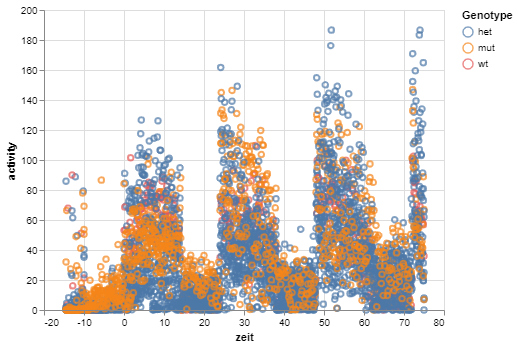

In [4]:
#Make Scatter Plot of Activity versus Zeitgeber Time for Each Genotype over the course of days 4-8
alt.Chart(df_small
    ).mark_point(
    ).encode(
        x='zeit:Q',
        y='activity:Q',
        color=alt.Color('genotype:N', title='Genotype')
)

**Figure 1: Activity vs. Zeitgeber Time Over 4 Day Experimental Period**

This scatterplot shows the level of activity of each genotype over the experimental days. It is useful to see the patterns of activity versus sleep that correlates with the troughs and peaks. We see a general increase in the maximum activity of each day compared to the day before. This may be due to the maturing and strengthening of the zebrafish. This graph does not allow us to distinguish the differences in activity between genotypes because of the crowding of the data points, so we will create a new scatterplot that is confined to one 24-hour period. This should generate a better visual to allow us to analyze the differences in activity between genotypes and its effect on the circadian rhythm.

In [5]:
#Generate an Array that Distinguishes Day 5 as TRUE and every other day as FALSE
inds = df['day'] == 5

#View Boolean Array
inds

0        False
1        False
2        False
3        False
4        False
         ...  
39269    False
39270    False
39271    False
39272    False
39273    False
Name: day, Length: 39274, dtype: bool

In [6]:
#Create New DataFrame with only Day 5 Rows
df_day5 = df.loc[inds, :]

#View New DataFrame
df_day5

,location,time,activity,zeit,zeit_ind,day,genotype,light
87,1,3/16/2013 9:00,41.0,0.000000,0,5,het,True
88,1,3/16/2013 9:10,91.1,0.166667,10,5,het,True
89,1,3/16/2013 9:20,84.7,0.333333,20,5,het,True
90,1,3/16/2013 9:30,69.3,0.500000,30,5,het,True
91,1,3/16/2013 9:40,0.0,0.666667,40,5,het,True
...,...,...,...,...,...,...,...,...
38962,96,3/17/2013 8:10,9.9,23.166667,1391,5,wt,False
38963,96,3/17/2013 8:20,2.0,23.333333,1401,5,wt,False
38964,96,3/17/2013 8:30,1.2,23.500000,1411,5,wt,False
38965,96,3/17/2013 8:40,3.0,23.666667,1421,5,wt,False


In [7]:
#Take the First 5000 Data Points (the max value for altair scatterplots)
df_day5_small = df_day5.head(5000)

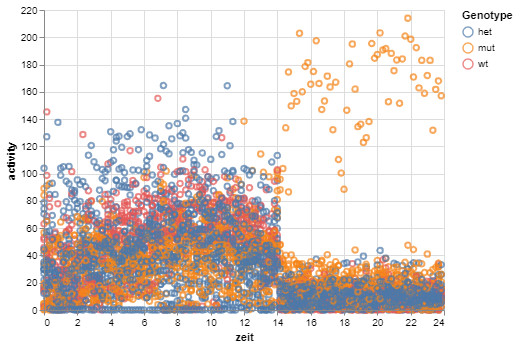

In [8]:
#Make Scatter Plot of Activity versus Zeitgeber Time for Each Genotype for first 5000 Day 5 Data points
alt.Chart(df_day5_small
    ).mark_point(
    ).encode(
        x='zeit:Q',
        y='activity:Q',
        color=alt.Color('genotype:N', title='Genotype')
)

**Figure 2: Activity vs. Zeitgeber Time Over 24-Hour Period on Day 5**

In this plot, we can better compare the relative magnitudes of activity for each genotype. For example, in the first 14-hour period (light on), the heterozygous zebrafish (blue) appears to have the most movement. It is clear that at hour 14, when the light is turned off, there is an immediate decrease in activity by most of the fish. However, in the 10-hour dark period, the mutant zebrafish (orange) are significantly more active than the other two groups. This higher level of activity at night shows that the mutants have a lower quality of sleep. We can conclude from this that the circadian rhythm of the mutants is disrupted. The mutant fish are lacking the gene that codes for melatonin production. This fact, paired with the observations from the graph, allow us to conclude that melatonin plays a key role in regulating the circadian rhythm.

**Potential Sources of Error**

In formulating these plots, we were only able to use 5000 data points because of the limitations on altair scatterplots. Therefore, the data in the figures is not completely representative of the entire data set. Additionally, the wide range of activity level of a single genotype, specifically mutants, makes it difficult to draw concrete conclusions and to disregard outliers. We decide that this wide range is something to be considered and not ignored, though we acknowledge the possibility of error.

## **Parametrization 2: Sleep Latency**

In [9]:
# Generate array to distinguish day 6
ind = df['day'] == 6

In [10]:
# Slice out rows we want (day 6 rows)
df_day6 = df.loc[ind, :]

In [11]:
# Generate array to distinguish when light is false during day 6
i = df_day6['light'] == False

# Slice out rows we want (dark rows)
df_6dark = df_day6.loc[i, :]

In [12]:
# Make new DataFrame with averaged traces grouped by genotype and Zeitbeger index
df6dark_averaged = df_6dark.groupby(['genotype', 'zeit_ind']).mean().reset_index()

# View data
df6dark_averaged.head()

,genotype,zeit_ind,location,activity,zeit,day,light
0,het,2281,47.235294,50.544118,38.000000,6.0,False
1,het,2291,47.235294,8.958824,38.166667,6.0,False
2,het,2301,47.235294,10.252941,38.333333,6.0,False
3,het,2311,47.235294,12.641176,38.500000,6.0,False
4,het,2321,47.235294,12.411765,38.666667,6.0,False


In [1]:
# Make plot of activty vs. time for the dark period of day 6
alt.Chart(df6dark_averaged
    ).mark_line(
        strokeJoin='bevel'
    ).encode(
        x=alt.X('zeit:Q', title='time (hours)'),
        y='activity:Q',
        color=alt.Color('genotype:N', sort=['wt', 'het', 'mut']),
        order='zeit:Q'
    ).interactive(
        bind_y=False
    )

NameError: name 'alt' is not defined

**Figure 3: Average Sleep Activity**

This plot shows the average activity of each genotype during the dark hours of day 6. From this plot, we can observe the average sleep latency of the genotypes.The amount of time it takes for each genotype to reach its lowest activity appears to be the same, so the sleep latency for each genotype is the same. However, the minimum activity level that is reached at the end of the sleep latency period for each genotype varies significantly. The mutant group has a much higher activity level during the 10-hour sleep period. The mutants' average activity level is centered at 30 while the heterozygous and wildtypes' average activity levels are centered at 10. The averages in this graph help us see the general trends of activity, however they don't allow us to see individual plots and outliers.

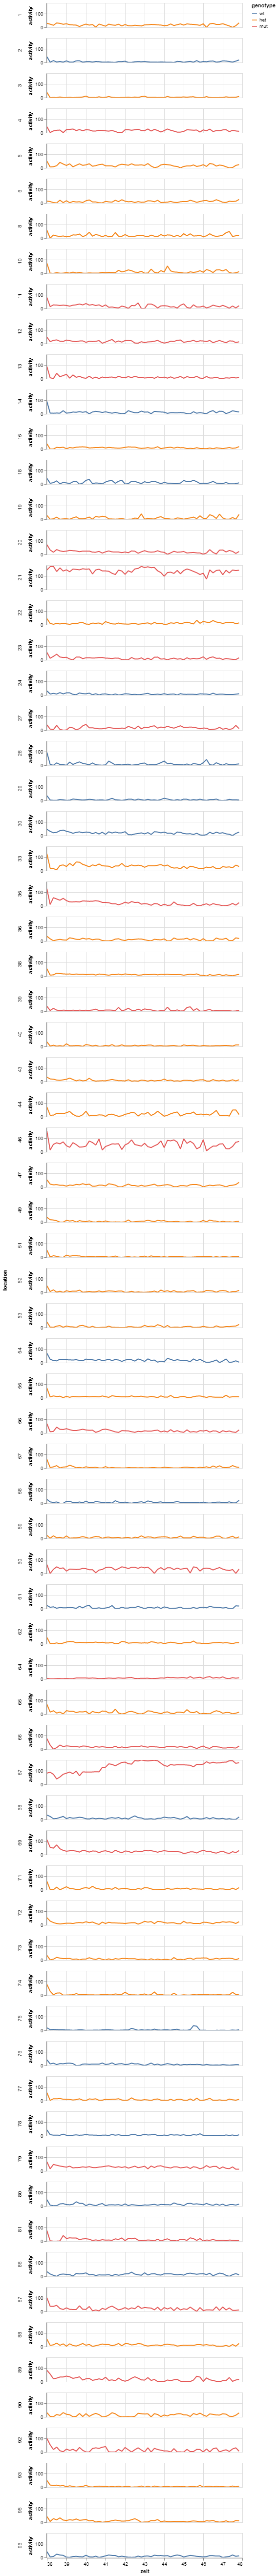

In [14]:
#Make a Plot of All Trajectories
alt.data_transformers.enable('json')

alt.Chart(df_6dark
    ).mark_line(
        strokeJoin='bevel'
    ).encode(
        x='zeit:Q',
        y='activity:Q',
        color=alt.Color('genotype:N', sort=['wt', 'het', 'mut']),
        order='zeit:Q',
        row=alt.Row('location:N', sort=['genotype', 'location']),
    ).properties(
        height=50
    ).interactive(
        bind_y=False
    )

**Figure 4: Individual Sleep Activity**

This plot shows the activity during dark hours of day 6 for each of the individual fish. This allows us to identify overly active individuals that may have influenced the average. For example, the mutant fish in locations 21, 46, and 67 shows overactivity during the sleep period. Similarly, the mutant in location 64 appears to have lower activity than other mutant fish. In this case, our representation of data makes it difficult to compare the trends in totality, but it allows us to observe specific pieces of data and outliers.

## **Author Contribution**

Sam and Kelly led the discussion regarding possible creative parameters to analyze the data. Sam addressed the maximum data limit issue with the altair scatterplot. Kelly selected the appropriate graphs to best represent the data. Natalie and Audrey attended TA office hours to clarify syntax and coding language confusions. Audrey made detailed comments and formatted markdowns. Natalie helped explain parameters and the significance of the data being presented. We all evenly contributed in efforts to generate code, format the graphs, and troubleshoot errors.

## **Computing Environment**

In [16]:
%load_ext watermark

In [17]:
%watermark -v -p numpy,pandas,altair,jupyterlab

CPython 3.7.4
IPython 7.8.0

numpy 1.16.5
pandas 0.25.1
altair 3.2.0
jupyterlab 1.1.3
